# sklearn.ensemble.HistGradientBoostingRegressor
- Boosting refers to a class of ensemble learning algorithms that add tree models to an ensemble sequentially. Each tree model added to the ensemble attempts to correct the prediction errors made by the tree models already present in the ensemble.

- Gradient boosting is a generalization of boosting algorithms like AdaBoost to a statistical framework that treats the training process as an additive model and allows arbitrary loss functions to be used, greatly improving the capability of the technique. As such, gradient boosting ensembles are the go-to technique for most structured (e.g. tabular data) predictive modeling tasks.

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[23]]

# Validation curves

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Learning rate
- float, default=0.1
- The learning rate, also known as shrinkage. This is used as a multiplicative factor for the leaves values. Use 1 for no shrinkage.

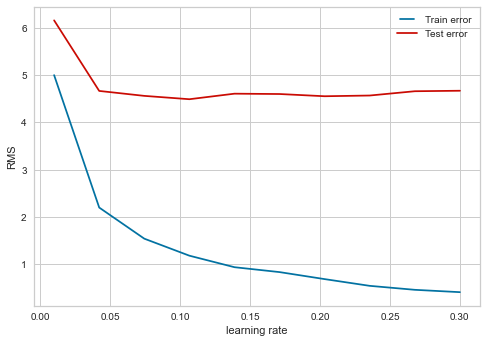

In [5]:
learning_rates = np.linspace(0.01,0.3,10)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(learning_rate=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('learning rate')
plt.show()


# max_iter
- int, default=100
- The maximum number of iterations of the boosting process, i.e. the maximum number of trees.

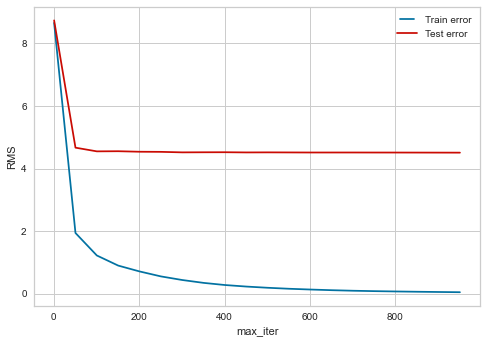

In [4]:
learning_rates = np.arange(1, 1000, 50)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(max_iter=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

# max_leaf_nodes
- int or None, default=31
- The maximum number of leaves for each tree. Must be strictly greater than 1. If None, there is no maximum limit.

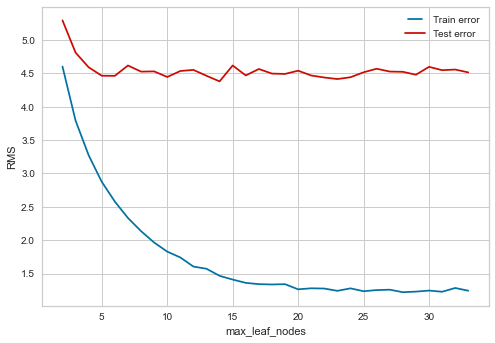

In [6]:
learning_rates = np.arange(2, 34, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(max_leaf_nodes=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_leaf_nodes')
plt.show()

# Max_depth
- int or None, default=None
- The maximum depth of each tree. The depth of a tree is the number of edges to go from the root to the deepest leaf. Depth isn’t constrained by default.

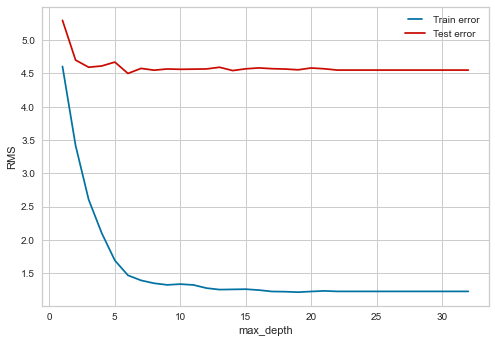

In [7]:
learning_rates = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_leaf
- int, default=20
- The minimum number of samples per leaf. For small datasets with less than a few hundred samples, it is recommended to lower this value since only very shallow trees would be built.

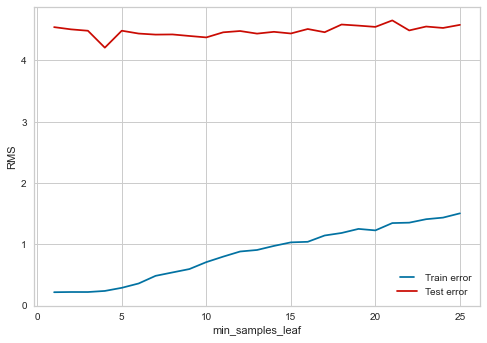

In [8]:
learning_rates = np.linspace(1, 25, 25, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

# l2_regularization
- float, default=0
- The L2 regularization parameter. Use 0 for no regularization (default).

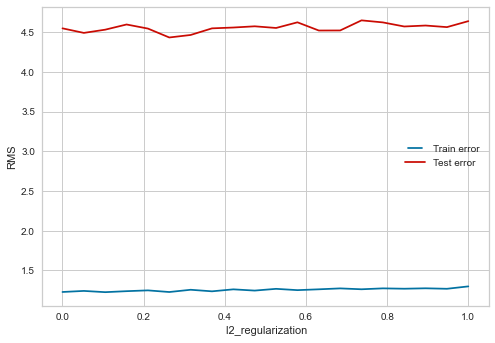

In [9]:
learning_rates =  np.linspace(0,1, 20, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(l2_regularization=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' l2_regularization')
plt.show()

---
---

# Random Hyperparameter Grid

In [42]:
hist_grid = {"learning_rate"   : [0.095,0.1,0.15],
             "max_iter":[130,140,150],
             "max_leaf_nodes":[16,17,18],
             "l2_regularization":[0.2,0.25,0.3],
             "scoring":['neg_root_mean_squared_error'],
             'max_depth'        : [7,8,9],
             "min_samples_leaf" :[1,2,3]
             }

In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = HistGradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = hist_grid, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.1min finished


RandomizedSearchCV(cv=10, estimator=HistGradientBoostingRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0.2, 0.25, 0.3],
                                        'learning_rate': [0.095, 0.1, 0.15],
                                        'max_depth': [7, 8, 9],
                                        'max_iter': [130, 140, 150],
                                        'max_leaf_nodes': [16, 17, 18],
                                        'min_samples_leaf': [1, 2, 3],
                                        'scoring': ['neg_root_mean_squared_error']},
                   random_state=42, verbose=2)

In [44]:
rf_random.best_params_

{'scoring': 'neg_root_mean_squared_error',
 'min_samples_leaf': 1,
 'max_leaf_nodes': 17,
 'max_iter': 140,
 'max_depth': 8,
 'learning_rate': 0.1,
 'l2_regularization': 0.25}

In [45]:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=110,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=25,learning_rate=0.02)#--0.64
# mod=HistGradientBoostingRegressor(max_iter=125,max_leaf_nodes=15,min_samples_leaf=2,max_depth=8,learning_rate=0.1,l2_regularization=0.25,scoring='neg_root_mean_squared_error')#--0.71
# mod=HistGradientBoostingRegressor(max_iter=140,max_leaf_nodes=17,min_samples_leaf=2,max_depth=7,learning_rate=0.095,l2_regularization=0.3,scoring='neg_root_mean_squared_error')#--0.71
mod=HistGradientBoostingRegressor(max_iter=140,max_leaf_nodes=17,min_samples_leaf=1,max_depth=8,learning_rate=0.1,l2_regularization=0.25,scoring='neg_root_mean_squared_error')#--0.71

In [46]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [47]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

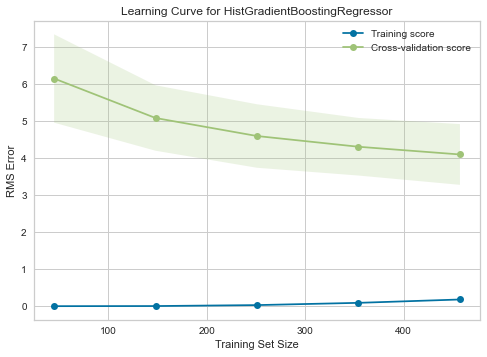

In [48]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [29]:
X = X.to_numpy()
y = y.to_numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [32]:
y_Test=y_Test.to_numpy()

In [49]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 3.697394

Root Mean squared error: 3.525283

Root Mean squared error: 5.516444

Root Mean squared error: 4.669916

Root Mean squared error: 3.523217

Root Mean squared error: 3.855182

Root Mean squared error: 5.523992

Root Mean squared error: 3.348120

Root Mean squared error: 3.103432

Root Mean squared error: 4.444258

error COV--->0    1.248642
dtype: float64  error mean --->0    2.886302
Name: mean, dtype: float64  error std --->0    3.603958
Name: std, dtype: float64


---
---

# Grid search

In [50]:
hist_grid = {"learning_rate"   : [0.095,0.1,0.15],
             "max_iter":[130,140,150],
             "max_leaf_nodes":[16,17,18],
             "l2_regularization":[0.2,0.25,0.3],
             "scoring":['neg_root_mean_squared_error'],
             'max_depth'        : [7,8,9],
             "min_samples_leaf" :[1,2,3]
             }

In [51]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
n_features=len(X.columns)
y=Data[Data.columns[23]]
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [53]:
rf = HistGradientBoostingRegressor()
reg = GridSearchCV(rf,param_grid = hist_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 729 candidates, totalling 7290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 7290 out of 7290 | elapsed: 20.7min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=HistGradientBoostingRegressor(), n_jobs=-1,
             param_grid={'l2_regularization': [0.2, 0.25, 0.3],
                         'learning_rate': [0.095, 0.1, 0.15],
                         'max_depth': [7, 8, 9], 'max_iter': [130, 140, 150],
                         'max_leaf_nodes': [16, 17, 18],
                         'min_samples_leaf': [1, 2, 3],
                         'scoring': ['neg_root_mean_squared_error']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [54]:
reg.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.2, learning_rate=0.095,
                              max_depth=7, max_iter=150, max_leaf_nodes=16,
                              min_samples_leaf=1,
                              scoring='neg_root_mean_squared_error')

---
---

In [55]:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=110,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=25,learning_rate=0.02)#--0.64
mod=HistGradientBoostingRegressor(l2_regularization=0.2, learning_rate=0.095,
                              max_depth=7, max_iter=150, max_leaf_nodes=16,
                              min_samples_leaf=1,
                              scoring='neg_root_mean_squared_error')

In [56]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [57]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

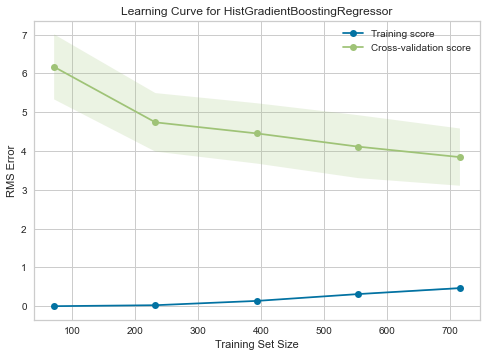

In [58]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [64]:
# X = X.to_numpy()
# y = y.to_numpy()
# y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 2.872920

Root Mean squared error: 3.265956

Root Mean squared error: 4.501430

Root Mean squared error: 3.351775

Root Mean squared error: 3.814741

Root Mean squared error: 2.947876

Root Mean squared error: 4.587598

Root Mean squared error: 3.826403

Root Mean squared error: 4.143429

Root Mean squared error: 4.936562

error COV--->0    1.146789
dtype: float64  error mean --->0    2.988196
Name: mean, dtype: float64  error std --->0    3.426832
Name: std, dtype: float64
